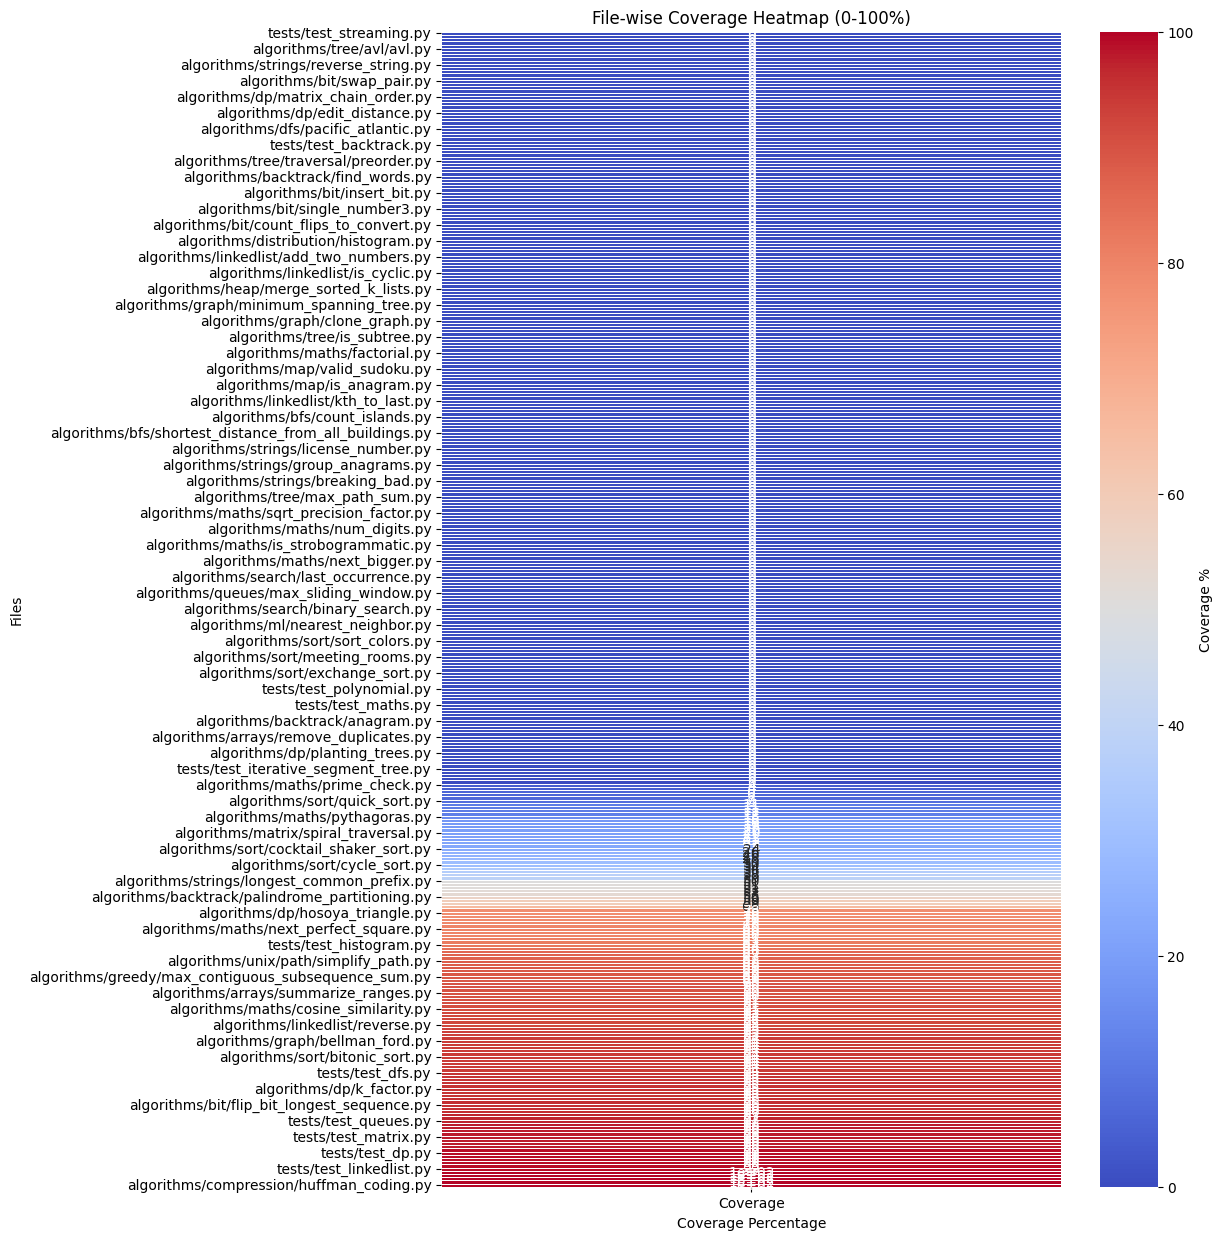

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the coverage report text file
file_path = "coverage_report.txt"  # Update path if needed

# Extract coverage data
coverage_data = []
with open(file_path, "r") as file:
    lines = file.readlines()

for line in lines:
    parts = line.split()
    if len(parts) >= 6 and parts[0].endswith(".py"):  # Ensure only Python files
        filename = parts[0]
        try:
            coverage = float(parts[-2].replace(',', '').strip('%'))  # Extract and clean coverage percentage
        except ValueError:
            coverage = 0  # Default to 0 if extraction fails
        coverage_data.append((filename, coverage))

# Convert to DataFrame
df_coverage = pd.DataFrame(coverage_data, columns=["File", "Coverage"])
df_coverage["Coverage"] = df_coverage["Coverage"].astype(float).clip(0, 100)  # Normalize between 0-100

df_coverage = df_coverage.sort_values(by="Coverage", ascending=True)  # Sort for better visualization

# Generate the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(df_coverage.set_index("File"), annot=True, cmap="coolwarm", linewidths=0.5, 
            cbar_kws={'label': 'Coverage %'}, vmin=0, vmax=100)
plt.title("File-wise Coverage Heatmap (0-100%)")
plt.xlabel("Coverage Percentage")
plt.ylabel("Files")
plt.show()

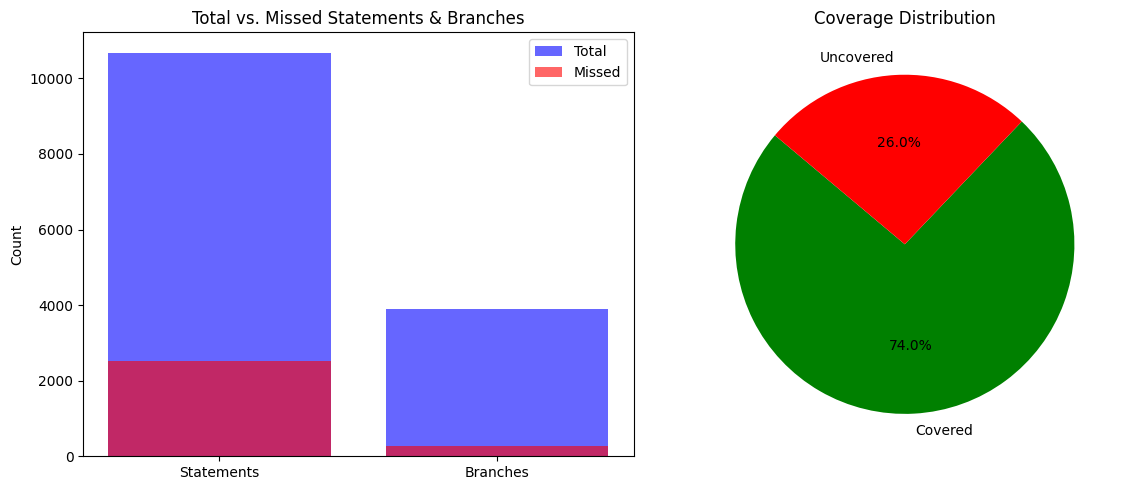

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Coverage data extracted from the report
total_statements = 10684
missed_statements = 2517
total_branches = 3894
missed_branches = 274
coverage_percentage = 74

# Data for bar chart
categories = ["Statements", "Branches"]
totals = [total_statements, total_branches]
missed = [missed_statements, missed_branches]

# Create figure for bar chart and pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart - Total vs Missed Statements & Branches
axes[0].bar(categories, totals, color='blue', alpha=0.6, label='Total')
axes[0].bar(categories, missed, color='red', alpha=0.6, label='Missed')
axes[0].set_title("Total vs. Missed Statements & Branches")
axes[0].set_ylabel("Count")
axes[0].legend()

# Pie Chart - Coverage Distribution
labels = ["Covered", "Uncovered"]
sizes = [coverage_percentage, 100 - coverage_percentage]
colors = ["green", "red"]
axes[1].pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
axes[1].set_title("Coverage Distribution")

plt.tight_layout()
plt.show()


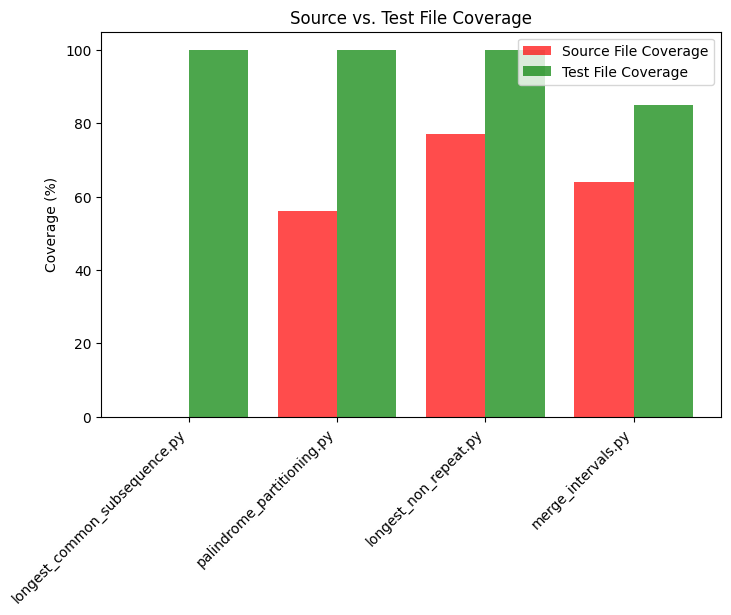

In [3]:
# Data for source files and their coverage percentages
source_files = [
    "longest_common_subsequence.py",
    "palindrome_partitioning.py",
    "longest_non_repeat.py",
    "merge_intervals.py"
]
source_coverage = [0, 56, 77, 64]

# Data for test files and their coverage percentages
test_files = [
    "test_longest_common_subsequence.py",
    "test_palindrome_partitioning.py",
    "test_longest_non_repeat.py",
    "test_merge_intervals.py"
]
test_coverage = [100, 100, 100, 85]

# Bar Chart - Comparing source file vs. test file coverage
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(source_files))
width = 0.4

ax.bar(x - width/2, source_coverage, width, label="Source File Coverage", color="red", alpha=0.7)
ax.bar(x + width/2, test_coverage, width, label="Test File Coverage", color="green", alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(source_files, rotation=45, ha="right")
ax.set_ylabel("Coverage (%)")
ax.set_title("Source vs. Test File Coverage")
ax.legend()

plt.show()


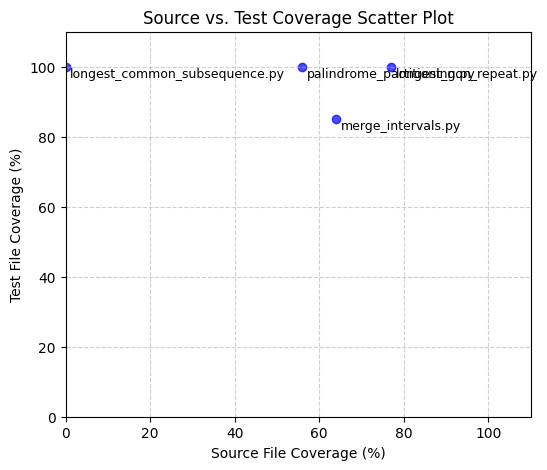

In [4]:
# Scatter plot - Source vs. Test Coverage
plt.figure(figsize=(6, 5))
plt.scatter(source_coverage, test_coverage, color="blue", alpha=0.7)

# Adding labels for each point
for i, txt in enumerate(source_files):
    plt.annotate(txt, (source_coverage[i] + 1, test_coverage[i] - 3), fontsize=9)

plt.xlabel("Source File Coverage (%)")
plt.ylabel("Test File Coverage (%)")
plt.title("Source vs. Test Coverage Scatter Plot")
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


Here is the scatter plot showing the relationship between source file coverage and test file coverage:

-Each point represents a file.
-Higher alignment along the diagonal indicates well-matching test coverage.
-Any points far from the diagonal suggest a mismatch between source and test coverage.

In [7]:
import pandas as pd
from tabulate import tabulate

# Define the data
data = [
    ["Empty Inputs", "Not tested", "test_case_0 tests an empty list", "✅ Covered"],
    ["None as Input", "Not tested", "test_case_2, test_case_4, test_case_12, test_case_13 test None input for multiple functions", "✅ Covered"],
    ["Boolean Inputs", "Not tested", "test_case_4, test_case_6 test True and False inputs", "✅ Covered"],
    ["Dictionary Inputs", "Not tested", "test_case_1, test_case_9 test an empty dictionary", "✅ Covered"],
    ["Byte Sequences (bytes)", "Not tested", "test_case_3, test_case_8, test_case_10, test_case_11 test byte sequences", "✅ Covered"],
    ["Floating-Point Numbers", "Not tested", "test_case_5 tests a float (37.0)", "✅ Covered"],
    ["Tuple Inputs", "Not tested", "test_case_8 tests a tuple containing bytes", "✅ Covered"],
    ["Object Inputs", "Not tested", "test_case_2, test_case_12, test_case_13 use an instance of object() as input", "✅ Covered"],
    ["Adversarial Inputs (Unexpected Formats)", "Not tested", "test_case_15 tests a multi-line string input", "✅ Covered"],
]

# Define column headers
headers = ["Category", "Manually Written Tests", "Pynguin-Generated Tests", "New Coverage"]

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Print table in a readable format
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+-----------------------------------------+--------------------------+---------------------------------------------------------------------------------------------+----------------+
|    | Category                                | Manually Written Tests   | Pynguin-Generated Tests                                                                     | New Coverage   |
+====+=========================================+==========================+=============================================================================================+================+
|  0 | Empty Inputs                            | Not tested               | test_case_0 tests an empty list                                                             | ✅ Covered     |
+----+-----------------------------------------+--------------------------+---------------------------------------------------------------------------------------------+----------------+
|  1 | None as Input                           | Not tested       

In [8]:
import pandas as pd
from tabulate import tabulate
import textwrap

# Function to wrap text in columns
def wrap_text(text, width=40):
    return "\n".join(textwrap.wrap(text, width))

# Define the data
data = [
    ["Empty Inputs", "Not tested", "test_case_0 tests an empty list", "✅ Covered"],
    ["None as Input", "Not tested", "test_case_2, test_case_4,\ntest_case_12, test_case_13\n(test None input for multiple functions)", "✅ Covered"],
    ["Boolean Inputs", "Not tested", "test_case_4, test_case_6\ntest True and False inputs", "✅ Covered"],
    ["Dictionary Inputs", "Not tested", "test_case_1, test_case_9\ntest an empty dictionary", "✅ Covered"],
    ["Byte Sequences (bytes)", "Not tested", "test_case_3, test_case_8,\ntest_case_10, test_case_11\n(test byte sequences)", "✅ Covered"],
    ["Floating-Point Numbers", "Not tested", "test_case_5 tests a float (37.0)", "✅ Covered"],
    ["Tuple Inputs", "Not tested", "test_case_8\ntests a tuple containing bytes", "✅ Covered"],
    ["Object Inputs", "Not tested", "test_case_2, test_case_12,\ntest_case_13\n(use an instance of object() as input)", "✅ Covered"],
    ["Adversarial Inputs (Unexpected Formats)", "Not tested", "test_case_15\ntests a multi-line string input", "✅ Covered"],
]

# Define column headers
headers = ["Category", "Manual Tests", "Generated Tests", "New Coverage"]

# Wrap text for better display
wrapped_data = [[wrap_text(str(cell), width=30) for cell in row] for row in data]

# Create DataFrame
df = pd.DataFrame(wrapped_data, columns=headers)

# Print table in a readable format
print(tabulate(df, headers="keys", tablefmt="fancy_grid"))


╒════╤════════════════════════════════╤════════════════╤═══════════════════════════════╤════════════════╕
│    │ Category                       │ Manual Tests   │ Generated Tests               │ New Coverage   │
╞════╪════════════════════════════════╪════════════════╪═══════════════════════════════╪════════════════╡
│  0 │ Empty Inputs                   │ Not tested     │ test_case_0 tests an empty    │ ✅ Covered     │
│    │                                │                │ list                          │                │
├────┼────────────────────────────────┼────────────────┼───────────────────────────────┼────────────────┤
│  1 │ None as Input                  │ Not tested     │ test_case_2, test_case_4,     │ ✅ Covered     │
│    │                                │                │ test_case_12, test_case_13    │                │
│    │                                │                │ (test None input for multiple │                │
│    │                                │         